In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from math import floor

rcParams["font.size"] = 14
rcParams["font.family"] = 'arial'

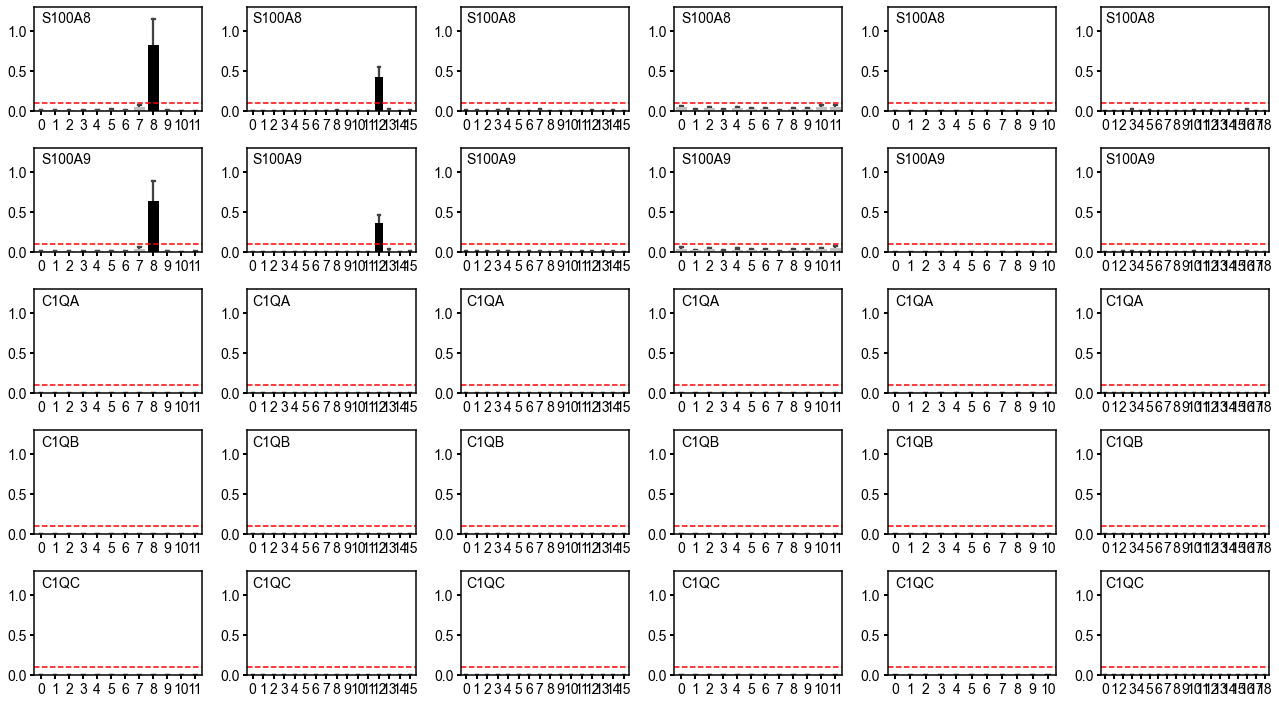

In [2]:
fig, axes = plt.subplots(5, 6, figsize=(18, 10), facecolor="white")

for i, proj in enumerate(["chen.b", "bandyopadhyay.b", "oetjen.b", "caron.b", "dejong.b", "disco.b"]):
    for j, gene in enumerate(["s100a8", "s100a9", "c1qa", "c1qb", "c1qc"]):
        df = pd.read_csv("%s.metadata.csv"%proj, index_col=0)
        colors = df.groupby("seurat_clusters")["pct.%s"%gene].mean().apply(lambda x:"silver" if x <0.1 else "black").tolist()
        ax = sns.barplot(data=df, x="seurat_clusters", y="pct.%s"%gene, capsize=0.2, ax=axes[j, i], 
                         hue="seurat_clusters", legend=False)
        ax = sns.barplot(data=df, x="seurat_clusters", y="pct.%s"%gene, errorbar=None, 
                         zorder=2, palette=colors, ax=ax, hue="seurat_clusters", legend=False)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.5)
        ax.xaxis.set_tick_params(width=2, length=4)
        ax.yaxis.set_tick_params(width=2, length=4)
        ax.set_ylim(0, 1.3)
        ax.axhline(y=0.1, color='r', linestyle='--')
        
        ax.set_ylabel("")
        ax.set_xlabel("")
        #ax.set_title(gene.upper())
        
        ax.text(0, 1.1, gene.upper())

plt.tight_layout()
#plt.savefig("mean_expr_comparison.png", dpi=200)